In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cols = ["Wood","Salt","Soft Ball","Ballon","Aluminum Trial 1","Aluminum Trial 2","Aluminum Average","Zinc Trial 1","Zinc Trial 2","Zinc Average","Unknown Trial 1","Unknown Trial 2", "Unknown Average"]
densities = [0.67,1.257,0.381,2.458E-5,2.861,2.854,6.105,4.625,5.02,4.957]
bar_colors = ["darksalmon", "lavender", "palegoldenrod", "blue", "dimgrey", "dimgrey", "dimgrey", "grey", "grey", "grey","silver","silver","silver"]
is_ml = [False, False, False, False, True, True, True, True, True, True, True, True, True]

In [3]:
# Helper function to round to sf
def round_sig(x, sig):
    return round(x, sig - int(np.floor(np.log10(abs(x)))) - 1)

# Calculate and insert averages with significant figures
for avg in ["Aluminum Average", "Zinc Average", "Unknown Average"]:
    index = cols.index(avg)
    trial_1 = densities[index-2]
    trial_2 = densities[index-1]
    
    # Determine the significant figures of the trials for division operation
    sig_figs_1 = len(str(trial_1))-1
    sig_figs_2 = len(str(trial_2))-1
    sig_figs = min(sig_figs_1, sig_figs_2)
    
    # Calculate average and round to significant figures
    avg_density = np.mean([trial_1, trial_2])
    avg_density_rounded = round_sig(avg_density, sig_figs)
    
    # Insert the calculated average back into the densities list
    densities.insert(index, avg_density_rounded)

print(len(densities), len(bar_colors), len(is_ml))

13 13 13


In [4]:
df = pd.DataFrame(columns=cols, data=np.array(densities).reshape(1,13))
df

,Wood,Salt,Soft Ball,Ballon,Aluminum Trial 1,Aluminum Trial 2,Aluminum Average,Zinc Trial 1,Zinc Trial 2,Zinc Average,Unknown Trial 1,Unknown Trial 2,Unknown Average
0,0.67,1.257,0.381,0.000025,2.861,2.854,2.858,6.105,4.625,5.365,5.02,4.957,4.99


In [5]:
# plt.rc('xtick', labelsize=12) 
# plt.rc('ytick', labelsize=22) 
# plt.figure(figsize=(28,14))
# plt.bar(x=cols,height=densities,color=bar_colors)
# plt.show()

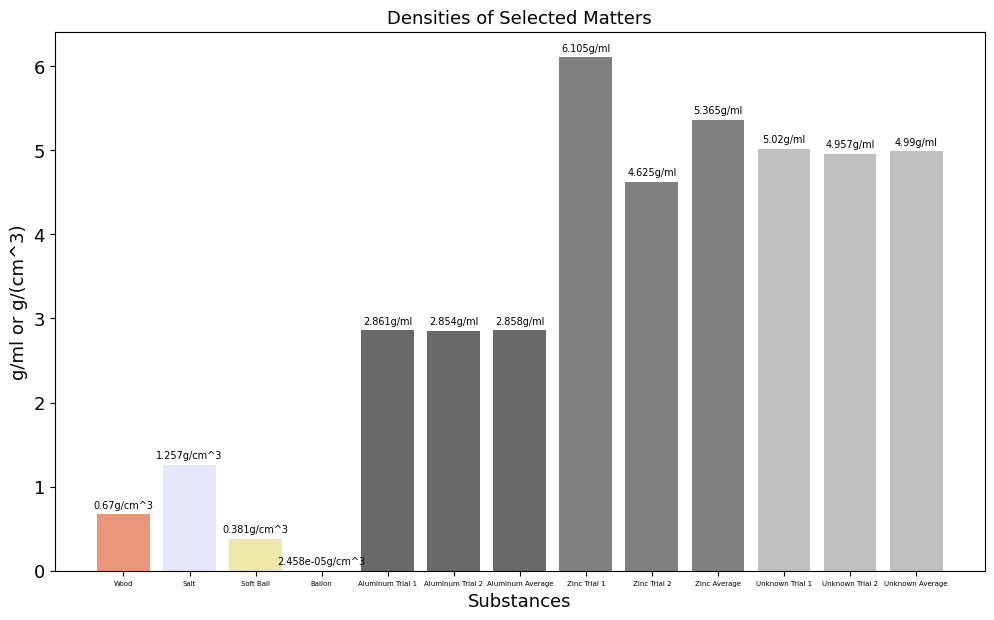

In [6]:
SMALL_SIZE = 5
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of title
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title

plt.rc('font', size=7)          # controls default text sizes
 
fig, ax1 = plt.subplots(figsize=(12, 7))
densities_labels = []
for i in range(len(densities)):
   densities_labels.append(str(densities[i]) + ("g/ml" if is_ml[i] else "g/cm^3"))

rects = ax1.bar(cols, densities, align='center',color=bar_colors)
# Partition the percentile values to be able to draw large numbers i
ax1.bar_label(rects, densities_labels, padding=3, color='black')

plt.title('Densities of Selected Matters')
plt.ylabel("g/ml or g/(cm^3)")
plt.xlabel("Substances")

plt.show() 
